In [15]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [16]:
# import the dataset and Extracting the Independent and Dependent variables
companies=pd.read_csv('E:/dataset/companies.csv')
X=companies.iloc[:,:-1].values
y=companies.iloc[:,4].values

companies.head()

,R&D,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,NY,192261.83
1,162597.70,151377.59,443898.53,CA,191792.06
2,153441.51,101145.55,407934.54,FL,191050.39
3,144378.41,118671.85,383199.62,NY,182901.99
4,142107.34,91391.77,366168.42,FL,166187.94


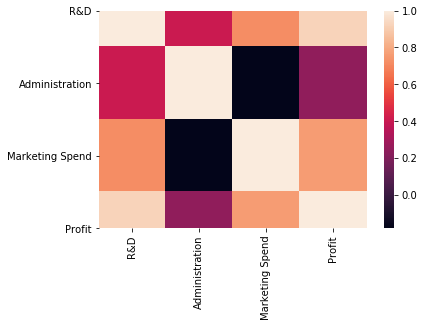

In [17]:
# Data Visualisation
# Build the correlation  matrix

sns.heatmap(companies.corr())

In [19]:
# Encoding Catagorical Data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder=LabelEncoder()
X[:, 3]=labelencoder.fit_transform(X[:, 3])

onehotencoder=OneHotEncoder(categorical_features=[3])
X=onehotencoder.fit_transform(X).toarray()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [20]:
# Avoid the dummy variable trap
X=X[:,1:]

In [21]:
# Spliting the data into Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
# Fitting multiple linear Regression to the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# Predicting the test set results
y_pred=regressor.predict(X_test)
print(y_pred)

[155788.94096214 171056.89501028]


In [24]:
# Calculate the co efficients
print(regressor.coef_)

[ 6.25095504e-08  5.86646339e+03  1.22822988e+04  0.00000000e+00
 -3.77690532e+03  3.38482000e+02 -3.77690532e+03  5.86646339e+03
 -2.08955807e+03  5.95492332e-01  1.17969234e-01]


In [25]:
# Calculate the Interceptor
print(regressor.intercept_)

56835.306779398205


In [26]:
# Calculate the R Sqaured value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.3444831656617311